In [1]:
import pandas as pd
from prophet import Prophet
import seaborn as sns

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_parquet("./data/parquets/2022-10.parquet")
df.head()

,station_id,num_bikes_available,num_bikes_available_types,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,datetime,time_since_prev_report,available_bikes_delta
0,2,15,"{'mechanical': 15, 'ebike': 0}",5,0,0,2022-09-30 23:58:13,False,IN_SERVICE,True,True,True,None,2022-10-01 00:02:00,NaN,NaN
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:02:34,False,IN_SERVICE,True,True,True,None,2022-10-01 00:06:00,261.0,-1.0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:06:53,False,IN_SERVICE,True,True,True,None,2022-10-01 00:10:00,259.0,0.0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:11:14,False,IN_SERVICE,True,True,True,None,2022-10-01 00:11:00,261.0,0.0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:15:34,False,IN_SERVICE,True,True,True,None,2022-10-01 00:17:00,260.0,0.0


In [3]:
df['ds'] = pd.to_datetime(df['last_reported'])
df['y'] = df['num_bikes_available']

# Base prophet model

In [4]:
m = Prophet()
m.fit(df.loc[df.station_id == 117][["ds", "y"]])

15:40:13 - cmdstanpy - INFO - Chain [1] start processing
15:40:13 - cmdstanpy - INFO - Chain [1] done processing


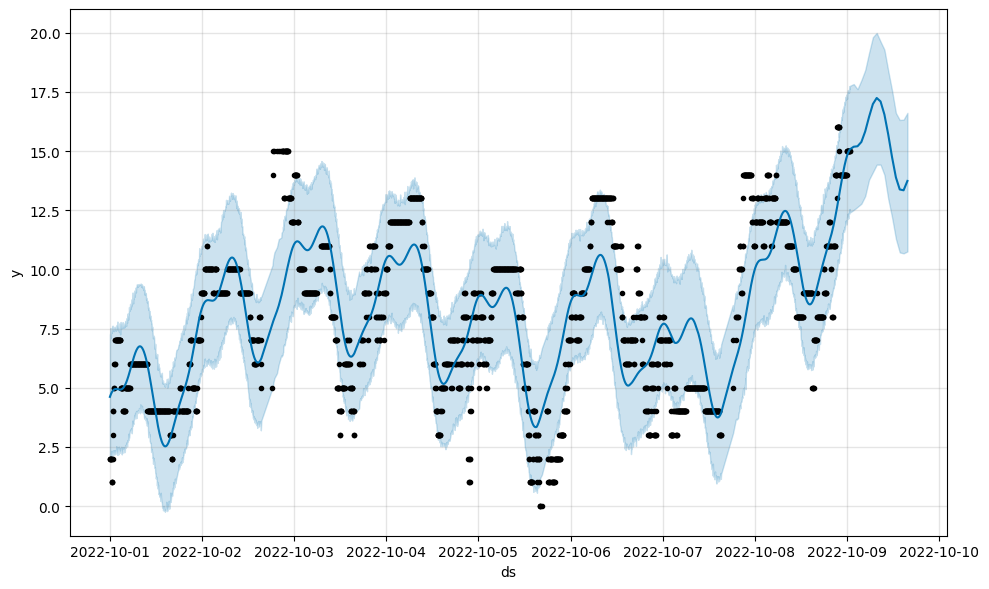

In [5]:
future = m.make_future_dataframe(periods=15, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

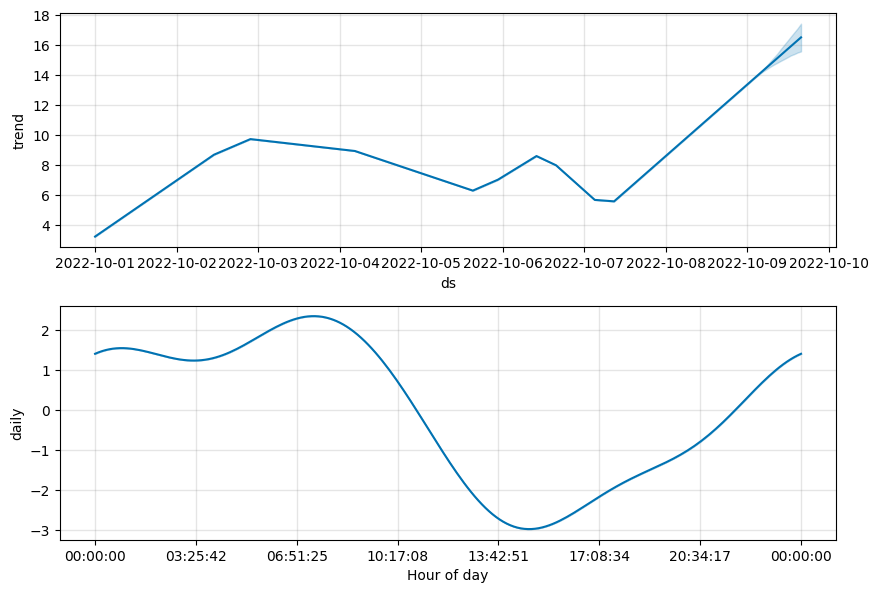

In [6]:
fig = m.plot_components(fcst);

# Mean lambda predictor

In [7]:
df["time_reported"] = df["last_reported"].dt.time

In [8]:
time_range = pd.date_range(start='1/1/2018', end='2/1/2018', freq='5min').time

df[(df["time_reported"] > time_range[130]) & (df["time_reported"] <= time_range[131])]["available_bikes_delta"].describe()

count    2812.000000
mean        0.003201
std         0.410192
min        -3.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: available_bikes_delta, dtype: float64

In [12]:
df["bikes_per_second"] = df["available_bikes_delta"] / df["time_since_prev_report"]
df["hour"] = df["last_reported"].dt.hour
df.head()

,station_id,num_bikes_available,num_bikes_available_types,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,...,is_returning,traffic,datetime,time_since_prev_report,available_bikes_delta,ds,y,time_reported,bikes_per_second,hour
0,2,15,"{'mechanical': 15, 'ebike': 0}",5,0,0,2022-09-30 23:58:13,False,IN_SERVICE,True,...,True,None,2022-10-01 00:02:00,NaN,NaN,2022-09-30 23:58:13,15,23:58:13,NaN,23
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:02:34,False,IN_SERVICE,True,...,True,None,2022-10-01 00:06:00,261.0,-1.0,2022-10-01 00:02:34,14,00:02:34,-0.003831,0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:06:53,False,IN_SERVICE,True,...,True,None,2022-10-01 00:10:00,259.0,0.0,2022-10-01 00:06:53,14,00:06:53,0.000000,0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:11:14,False,IN_SERVICE,True,...,True,None,2022-10-01 00:11:00,261.0,0.0,2022-10-01 00:11:14,14,00:11:14,0.000000,0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:15:34,False,IN_SERVICE,True,...,True,None,2022-10-01 00:17:00,260.0,0.0,2022-10-01 00:15:34,14,00:15:34,0.000000,0


<AxesSubplot: xlabel='time_since_prev_report', ylabel='available_bikes_delta'>

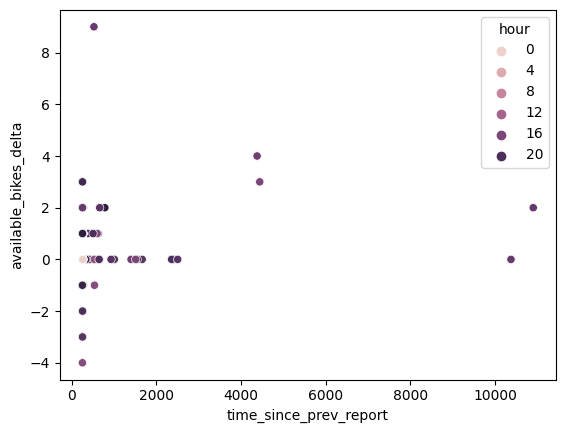

In [13]:
sns.scatterplot(data=df.loc[df.station_id == 117], y="available_bikes_delta",
    hue="hour",
    x="time_since_prev_report")

In [11]:
df.loc[(df.station_id == 117) & (df.available_bikes_delta != 0)].groupby("hour").mean()

/tmp/ipykernel_249759/1944878906.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.loc[(df.station_id == 117) & (df.available_bikes_delta != 0)].groupby("hour").mean()


,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_charging_station,is_installed,is_renting,is_returning,time_since_prev_report,available_bikes_delta,y,bikes_per_second
hour,,,,,,,,,,,,,
0,117.0,8.035714,1.500000,6.464286,0.0,0.0,1.0,1.0,1.0,260.750000,0.285714,8.035714,0.001116
1,117.0,7.764706,1.352941,6.882353,0.0,0.0,1.0,1.0,1.0,259.235294,-0.176471,7.764706,-0.000673
2,117.0,7.076923,1.846154,7.076923,0.0,0.0,1.0,1.0,1.0,259.384615,-0.076923,7.076923,-0.000287
3,117.0,8.461538,1.384615,6.153846,0.0,0.0,1.0,1.0,1.0,259.538462,0.076923,8.461538,0.000303
4,117.0,9.666667,1.666667,4.666667,0.0,0.0,1.0,1.0,1.0,259.000000,0.666667,9.666667,0.002569
5,117.0,11.142857,2.428571,2.428571,0.0,0.0,1.0,1.0,1.0,259.428571,0.571429,11.142857,0.002187
6,117.0,9.750000,2.000000,4.250000,0.0,0.0,1.0,1.0,1.0,258.750000,1.000000,9.750000,0.003865
8,117.0,11.000000,2.000000,3.000000,0.0,0.0,1.0,1.0,1.0,260.000000,-1.000000,11.000000,-0.003846
9,117.0,9.941176,1.235294,4.823529,0.0,0.0,1.0,1.0,1.0,258.588235,-0.705882,9.941176,-0.002733


In [15]:
len(df[df.num_bikes_available == 0])/ len (df)

0.08319908892252435

In [16]:
len(df[df.num_bikes_available == 1])/ len (df)

0.09238286668191618